<a href="https://colab.research.google.com/github/yewkwanghooi/FetchDoc/blob/master/my_Line_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


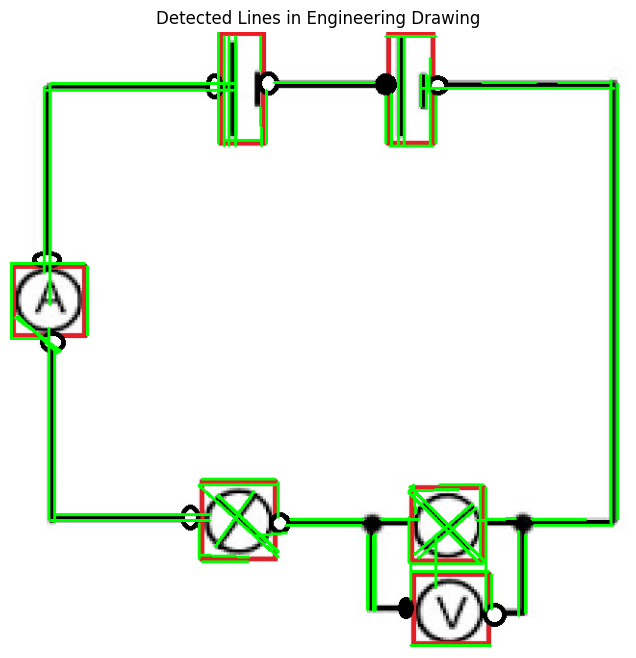

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_lines(image_path, output_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(blurred)

    # Apply morphological closing to enhance edges
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(enhanced, cv2.MORPH_CLOSE, kernel)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(closed, 30, 100)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)

    # Draw detected lines on a copy of the original image
    output_image = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the result
    cv2.imwrite(output_path, output_image)

    # Display the result (optional, for visualization)
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Lines in Engineering Drawing')
    plt.show()

# Example usage
image_path = '/content/1.jpg'
output_path = '/content/output_image.jpg'
detect_lines(image_path, output_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

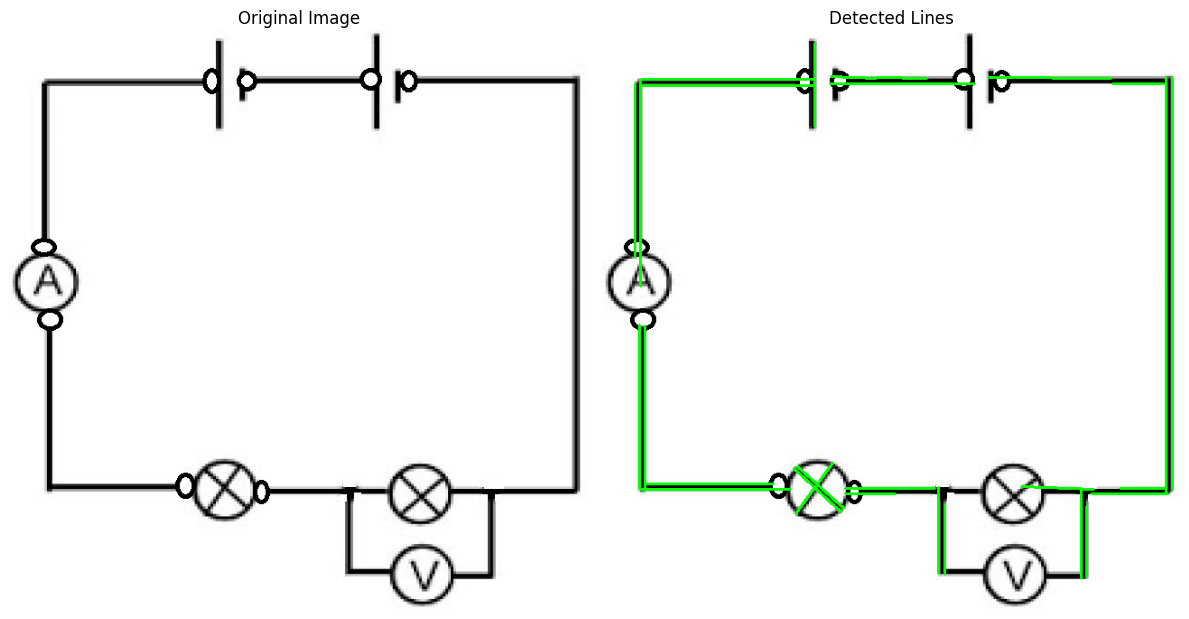

In [ ]:
#hough
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect the color bounding box around symbols
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([130, 50, 50])
    upper_bound = np.array([170, 255, 255])
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Dilate the mask to ensure the bounding box area is covered
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Apply the mask to remove symbols (assuming symbols are in color)
    masked_image = cv2.bitwise_and(image, image, mask=~mask)

    # Enhance contrast using CLAHE on the masked grayscale image
    gray_masked = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray_masked)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (7, 7), 0)

    return image, gray, blurred

def detect_lines(blurred, original_image):
    # Apply edge detection (Canny, Sobel, etc.)
    edges = cv2.Canny(blurred, 50, 150)

    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Draw the lines on the original image
    line_image = original_image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return line_image

def main(image_path):
    try:
        image, gray, blurred = preprocess_image(image_path)
        result_image = detect_lines(blurred, image)

        # Display the result
        plt.figure(figsize=(12, 8))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Lines')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/download-6-_png.rf.8bad9e8015de68cef17db41b39c8d0eb.jpg')


above is color-based masking of symbols

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

# Step 1: Upload the Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Open the image and convert it to a numpy array
image = Image.open(image_path)
image_array = np.array(image)

print(f"Image shape: {image_array.shape}")

# Step 2: Implement the Neighbor-Finding Logic
def get_neighbours(pixel, image_array):
    height, width = image_array.shape[:2]
    x, y = pixel

    neighbours = []
    # Define the possible neighbor positions (8-connectivity)
    positions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in positions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < height and 0 <= ny < width:
            neighbours.append((nx, ny))

    return neighbours

def next_pixel(current_pixel, image_array):
    neighbours = get_neighbours(current_pixel, image_array)
    done = False
    next_pixel = current_pixel

    if len(neighbours) == 0:
        done = True
        return done, next_pixel

    if len(neighbours) == 1:
        next_pixel = neighbours[0]
        return done, next_pixel

    if len(neighbours) > 1:
        next_pixel = neighbours[0]  # This line can be modified to choose an appropriate next pixel.
        done = True
        return done, next_pixel

# Step 3: Run the Algorithm
def main(image_array):
    connections = []
    start_pixels = [(0, 0)]  # Placeholder for the list of start pixels, can be modified to any starting points.

    for start_pixel in start_pixels:
        p = start_pixel
        done = False

        while not done:
            done, p = next_pixel(p, image_array)
            if len(get_neighbours(p, image_array)) > 1:
                start_pixels.append(p)

        connections.append([start_pixel, p])

    return connections

# Run the main function
connections = main(image_array)

print(connections)


Saving 1.jpg to 1 (1).jpg
Image shape: (640, 640, 3)


above for trying on the entire image. to check if preprocessing and line detection works. then do something about the symbols.


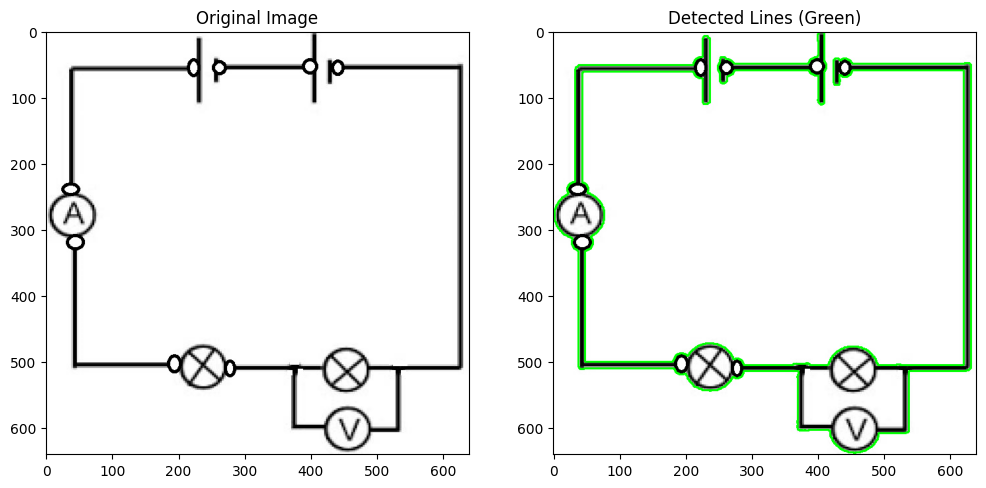

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image (replace with your image path)
image_path = '/content/download-6-_png.rf.8bad9e8015de68cef17db41b39c8d0eb.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Compute gradients using Sobel operators
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

# Step 2: Compute gradient magnitude and threshold
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
threshold = np.mean(gradient_magnitude) + np.std(gradient_magnitude)
edges = gradient_magnitude > threshold

# Step 3: Line detection using connected components or contour detection
contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected lines on the original image
detected_lines_image = np.copy(image)
cv2.drawContours(detected_lines_image, contours, -1, (0, 255, 0), 2)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_lines_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines (Green)')
plt.show()


with symbol localization


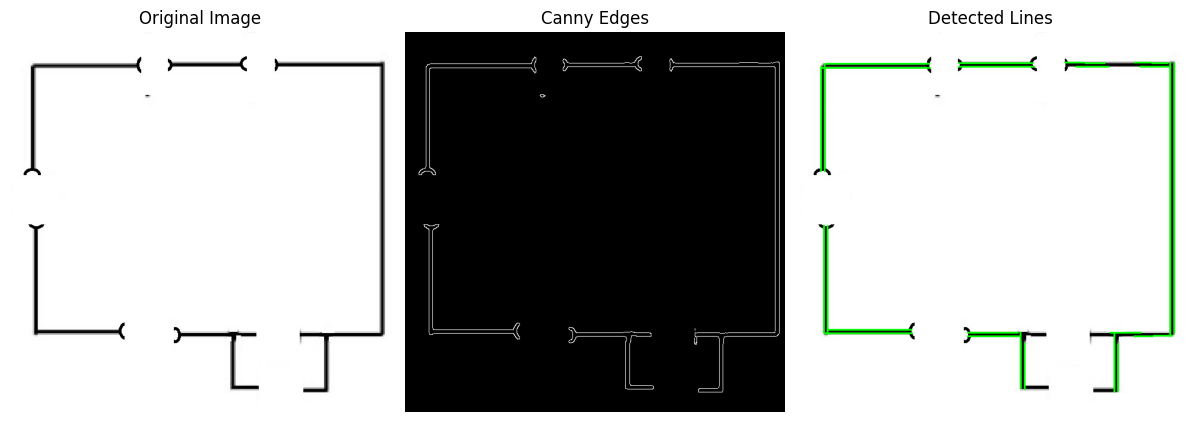

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect the color bounding box around symbols
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([130, 50, 50])
    upper_bound = np.array([170, 255, 255])
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Dilate the mask to ensure the bounding box area is covered
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Apply the mask to remove symbols (assuming symbols are in color)
    masked_image = cv2.bitwise_and(image, image, mask=~mask)

    # Enhance contrast using CLAHE on the masked grayscale image
    gray_masked = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray_masked)

    return image, gray, enhanced

def detect_edges(enhanced):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (7, 7), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    return edges

def detect_lines(edges):
    # Detect lines using the probabilistic Hough line transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
    return lines

def draw_lines(image, lines):
    # Draw lines on the image
    line_image = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return line_image

def main(image_path):
    try:
        image, gray, enhanced = preprocess_image(image_path)
        edges = detect_edges(enhanced)
        lines = detect_lines(edges)
        result_image = draw_lines(image, lines)

        # Display the result
        plt.figure(figsize=(12, 8))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny Edges')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Lines')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/22.jpg')


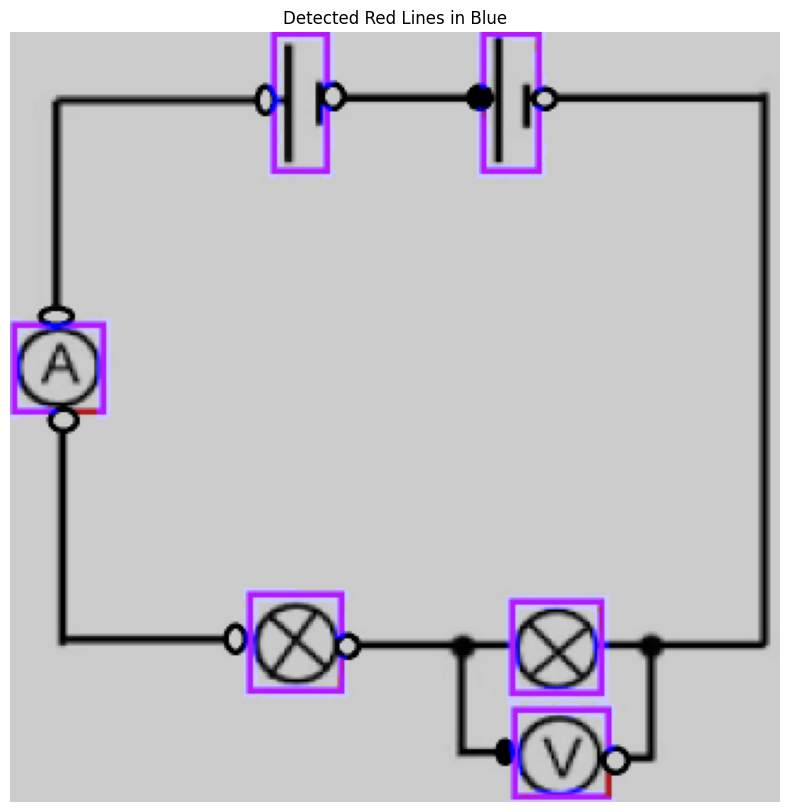

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/1 (1).jpg'
SLD = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(SLD, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Apply Gaussian Blur to the mask
blurred = cv2.GaussianBlur(mask, (5, 5), 0)

# Morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, kernel, iterations=1)

# Line detection using Hough Transform
lines = cv2.HoughLinesP(cleaned, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

# Create a blank image to draw lines
line_image = np.zeros_like(SLD)

# Draw detected lines in blue color
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue color lines

# Resize the original image and line image to reduce output size
scale_percent = 50  # Percent of original size
width = int(SLD.shape[1] * scale_percent / 100)
height = int(SLD.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize images
resized_SLD = cv2.resize(SLD, dim, interpolation=cv2.INTER_AREA)
resized_line_image = cv2.resize(line_image, dim, interpolation=cv2.INTER_AREA)

# Overlay detected lines on the resized original image
detected_lines_image = cv2.addWeighted(resized_SLD, 0.8, resized_line_image, 1, 0)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(detected_lines_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Red Lines in Blue')
plt.axis('off')
plt.show()

# Save the resulting image (optional)
output_path = '/content/1 (3).jpg'
cv2.imwrite(output_path, detected_lines_image)


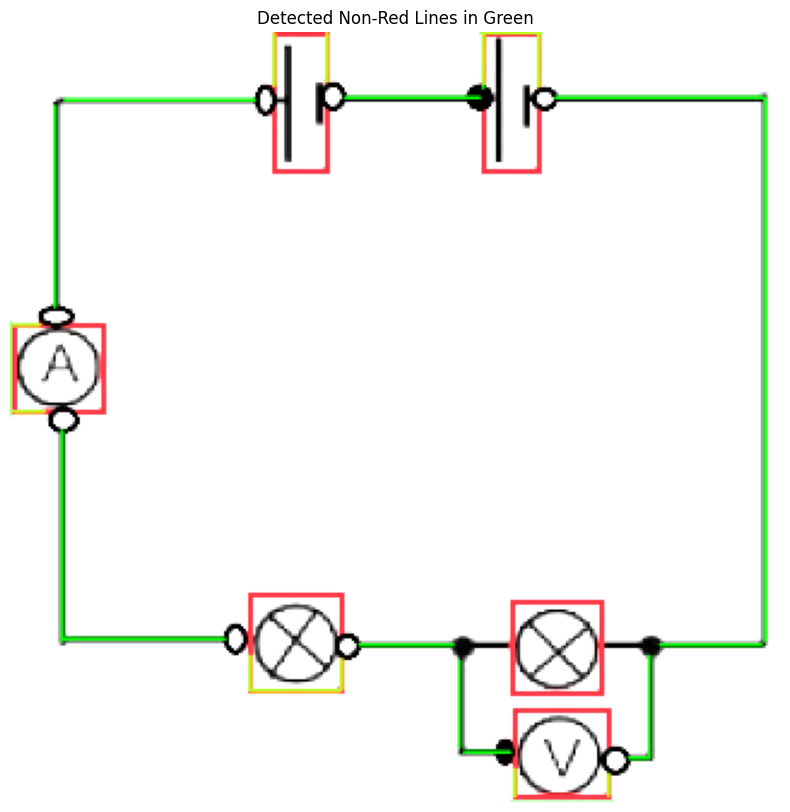

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def skeletonize_image(image):
    # Apply binary thresholding
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Perform skeletonization
    thinned_image = cv2.ximgproc.thinning(binary)

    return thinned_image

def detect_connections(thinned_image, original_image):
    # Detect contours
    contours, _ = cv2.findContours(thinned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find connections
    connections = []
    for contour in contours:
        if cv2.contourArea(contour) > 50:  # Example area threshold to filter out small contours
            for i in range(len(contour) - 1):
                p1 = tuple(contour[i][0])
                p2 = tuple(contour[i + 1][0])
                if cv2.norm(np.array(p1) - np.array(p2)) > 10:
                    connections.append((p1, p2))

    # Draw the connections on the original image
    connection_image = original_image.copy()
    for connection in connections:
        cv2.line(connection_image, connection[0], connection[1], (0, 255, 0), 2)

    return connection_image

# Load the image
image_path = '/content/1 (1).jpg'
SLD = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(SLD, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Dilate the red mask to ensure red lines are fully masked
kernel = np.ones((3, 3), np.uint8)
dilated_red_mask = cv2.dilate(red_mask, kernel, iterations=2)

# Invert the red mask to get non-red regions
non_red_mask = cv2.bitwise_not(dilated_red_mask)

# Use the non-red mask to isolate non-red regions in the original image
non_red_image = cv2.bitwise_and(SLD, SLD, mask=non_red_mask)

# Convert the non-red image to grayscale
gray_non_red_image = cv2.cvtColor(non_red_image, cv2.COLOR_BGR2GRAY)

# Perform skeletonization on the non-red image
thinned_image = skeletonize_image(gray_non_red_image)

# Detect connections (non-red lines) and draw them on the original image
connection_image = detect_connections(thinned_image, SLD)

# Resize the original image and the image with detected connections to reduce output size
scale_percent = 50  # Percent of original size
width = int(SLD.shape[1] * scale_percent / 100)
height = int(SLD.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize images
resized_SLD = cv2.resize(SLD, dim, interpolation=cv2.INTER_AREA)
resized_connection_image = cv2.resize(connection_image, dim, interpolation=cv2.INTER_AREA)

# Overlay detected lines on the resized original image
detected_lines_image = cv2.addWeighted(resized_SLD, 0.8, resized_connection_image, 1, 0)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(detected_lines_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Non-Red Lines in Green')
plt.axis('off')
plt.show()

# Save the resulting image (optional)
output_path = '/content/1 (line).jpg'
cv2.imwrite(output_path, detected_lines_image)


In [ ]:
!pip install opencv-python-headless


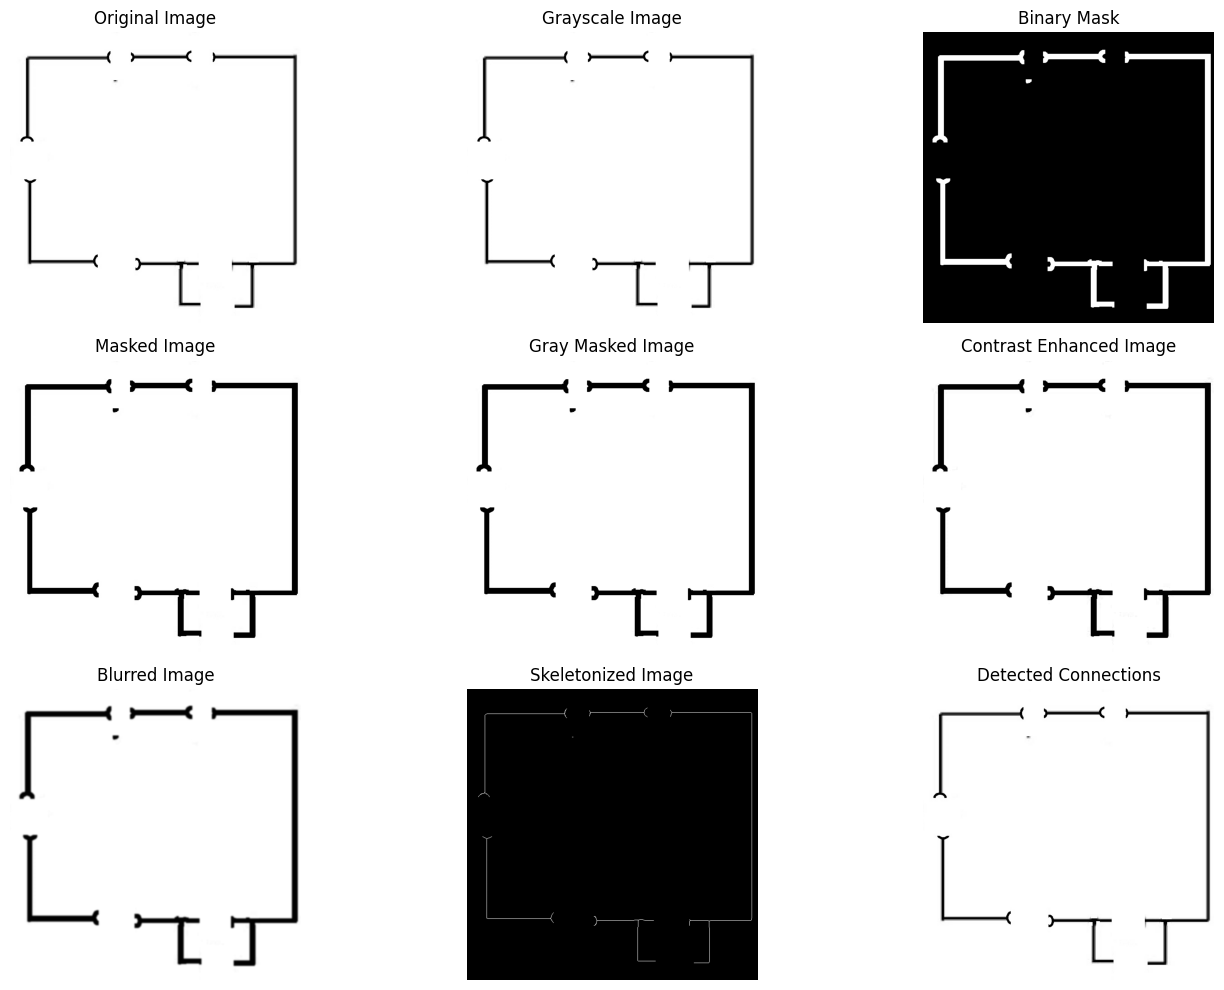

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding to detect potential symbols
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Dilate the mask to ensure the bounding box area is covered
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Apply the mask to remove symbols (assuming symbols are in color)
    masked_image = cv2.bitwise_and(image, image, mask=~mask)

    # Enhance contrast using CLAHE on the masked grayscale image
    gray_masked = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray_masked)


    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (7, 7), 0)

    return image, gray, mask, masked_image, gray_masked, enhanced, blurred

def skeletonize_image(image):
    # Apply binary thresholding
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Perform skeletonization
    skeleton = cv2.ximgproc.thinning(binary)

    return skeleton

def detect_connections(skeleton, original_image):
    # Detect contours
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find connections
    connections = []
    for contour in contours:
        if cv2.contourArea(contour) > 50:  # Example area threshold to filter out small contours
            for i in range(len(contour) - 1):
                p1 = tuple(contour[i][0])
                p2 = tuple(contour[i + 1][0])
                if cv2.norm(np.array(p1) - np.array(p2)) > 10:
                    connections.append((p1, p2))

    # Draw the connections on the original image
    connection_image = original_image.copy()
    for connection in connections:
        cv2.line(connection_image, connection[0], connection[1], (0, 255, 0), 2)

    return connection_image

def main(image_path):
    try:
        image, gray, mask, masked_image, gray_masked, enhanced, blurred = preprocess_image(image_path)
        skeleton = skeletonize_image(blurred)
        result_image = detect_connections(skeleton, image)

        # Display the result
        plt.figure(figsize=(15, 10))

        plt.subplot(3, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(3, 3, 2)
        plt.imshow(gray, cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')

        plt.subplot(3, 3, 3)
        plt.imshow(mask, cmap='gray')
        plt.title('Binary Mask')
        plt.axis('off')

        plt.subplot(3, 3, 4)
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.title('Masked Image')
        plt.axis('off')

        plt.subplot(3, 3, 5)
        plt.imshow(gray_masked, cmap='gray')
        plt.title('Gray Masked Image')
        plt.axis('off')

        plt.subplot(3, 3, 6)
        plt.imshow(enhanced, cmap='gray')
        plt.title('Contrast Enhanced Image')
        plt.axis('off')

        plt.subplot(3, 3, 7)
        plt.imshow(blurred, cmap='gray')
        plt.title('Blurred Image')
        plt.axis('off')

        plt.subplot(3, 3, 8)
        plt.imshow(skeleton, cmap='gray')
        plt.title('Skeletonized Image')
        plt.axis('off')

        plt.subplot(3, 3, 9)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Connections')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/download-6-_png.rf.8bad9e8015de68cef17db41b39c8d0eb.jpg')


**Below skeletanizatio--pixel-based search* without canny

1.   List item
2.   List item



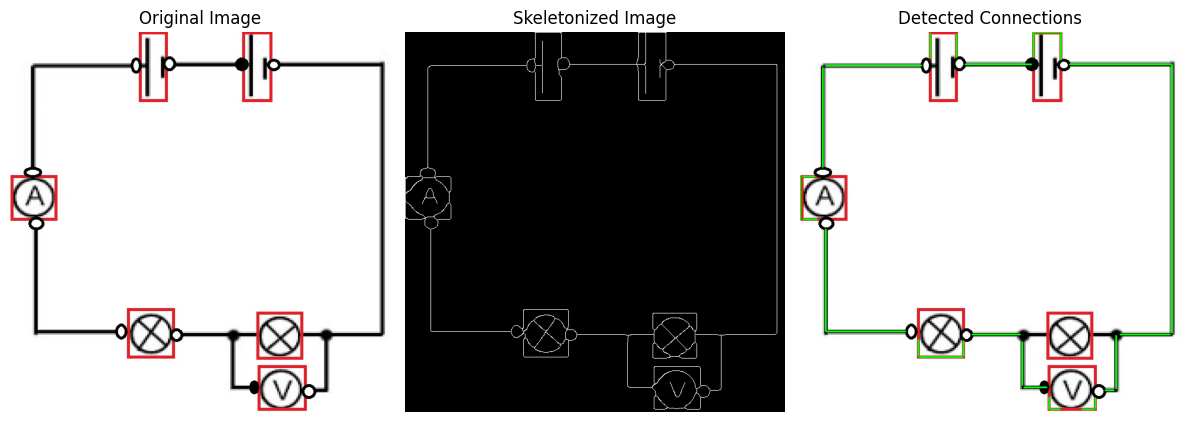

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect the color bounding box around symbols
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([130, 50, 50])
    upper_bound = np.array([170, 255, 255])
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Dilate the mask to ensure the bounding box area is covered
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    # Apply the mask to remove symbols (assuming symbols are in color)
    masked_image = cv2.bitwise_and(image, image, mask=~mask)

    # Enhance contrast using CLAHE on the masked grayscale image
    gray_masked = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray_masked)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (7, 7), 0)

    return image, gray, blurred

def skeletonize_image(image):
    # Apply binary thresholding
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Perform skeletonization
    skeleton = cv2.ximgproc.thinning(binary)

    return skeleton

def detect_connections(skeleton, original_image):
    # Detect contours
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find connections
    connections = []
    for contour in contours:
        if cv2.contourArea(contour) > 50:  # Example area threshold to filter out small contours
            for i in range(len(contour) - 1):
                p1 = tuple(contour[i][0])
                p2 = tuple(contour[i + 1][0])
                if cv2.norm(np.array(p1) - np.array(p2)) > 10:
                    connections.append((p1, p2))

    # Draw the connections on the original image
    connection_image = original_image.copy()
    for connection in connections:
        cv2.line(connection_image, connection[0], connection[1], (0, 255, 0), 2)

    return connection_image

def main(image_path):
    try:
        image, gray, blurred = preprocess_image(image_path)
        skeleton = skeletonize_image(blurred)
        result_image = detect_connections(skeleton, image)

        # Display the result
        plt.figure(figsize=(12, 8))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(skeleton, cmap='gray')
        plt.title('Skeletonized Image')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Connections')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/1 (1).jpg')


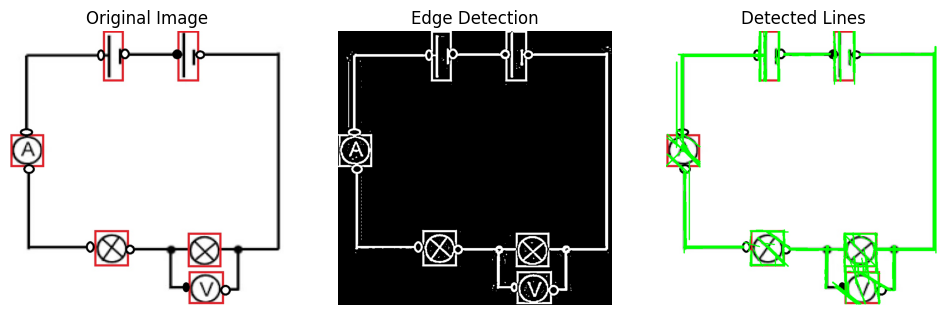

In [ ]:
#hough
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

    return image, gray, blurred

def detect_edges(blurred):
    # Use adaptive thresholding to detect edges
    adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY_INV, 11, 2)
    return adaptive_thresh

def detect_lines(edges, original_image):
    # Use Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=30, maxLineGap=10)

    # Draw the lines on the original image
    line_image = original_image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return line_image

def main(image_path):
    try:
        image, gray, blurred = preprocess_image(image_path)
        edges = detect_edges(blurred)
        result_image = detect_lines(edges, image)

        # Display the result
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Lines')
        plt.axis('off')

        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/1.jpg')


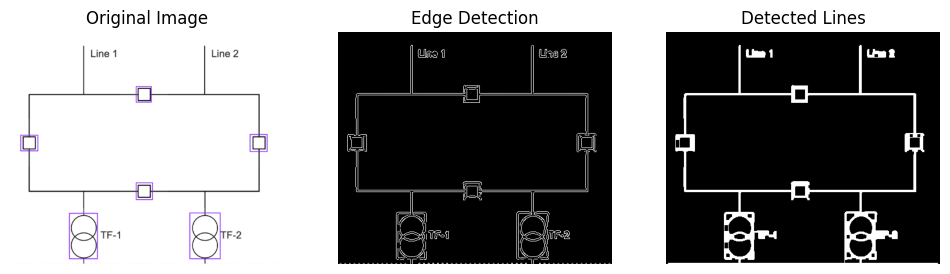

In [ ]:
#hough etc

import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)

    return image, gray, blurred

def detect_edges(blurred):
    # Use adaptive thresholding to detect edges
    adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY_INV, 11, 2)

    # Use Canny edge detection
    edges = cv2.Canny(adaptive_thresh, 50, 150, apertureSize=3)

    return edges

def detect_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def hough_transform(edges):
    # Use Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=30, maxLineGap=10)
    return lines

def merge_lines(lines, contours, image_shape):
    # Create an empty image to draw the merged lines
    merged_lines_image = np.zeros(image_shape, dtype=np.uint8)

    # Draw contours as initial lines
    for contour in contours:
        for i in range(len(contour) - 1):
            x1, y1 = contour[i][0]
            x2, y2 = contour[i + 1][0]
            cv2.line(merged_lines_image, (x1, y1), (x2, y2), 255, 1)

    # Draw Hough lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(merged_lines_image, (x1, y1), (x2, y2), 255, 1)

    # Apply morphological closing to merge close lines
    kernel = np.ones((5, 5), np.uint8)
    merged_lines_image = cv2.morphologyEx(merged_lines_image, cv2.MORPH_CLOSE, kernel)

    return merged_lines_image

def main(image_path):
    try:
        # Preprocess the image
        image, gray, blurred = preprocess_image(image_path)

        # Detect edges
        edges = detect_edges(blurred)

        # Detect contours
        contours = detect_contours(edges)

        # Detect lines using Hough Transform
        lines = hough_transform(edges)

        # Merge lines and contours
        merged_lines_image = merge_lines(lines, contours, gray.shape)

        # Display the result
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(merged_lines_image, cmap='gray')
        plt.title('Detected Lines')
        plt.axis('off')

        plt.show()

    except FileNotFoundError as e:
        print(e)

# Run the main function with the correct image path
main('/content/annotation for line.PNG')


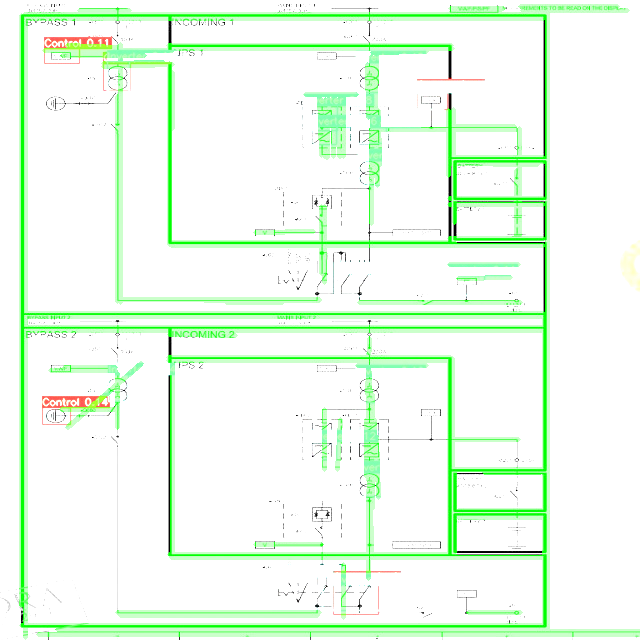

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for better edge smoothing
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(blurred)

    # Apply morphological operations to enhance lines
    kernel = np.ones((2, 2), np.uint8)
    dilated = cv2.dilate(cl1, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(eroded, 50, 150)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=5)

    # Create a copy of the original image to draw lines
    line_image = np.copy(image)

    # Draw detected lines on the copied image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Increased thickness to 3

    # Apply weighted addition to overlay lines on the original image
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)

    # Save the result
    cv2.imwrite(output_path, result)

    # Display the result
    cv2_imshow(result)

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = 'output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)


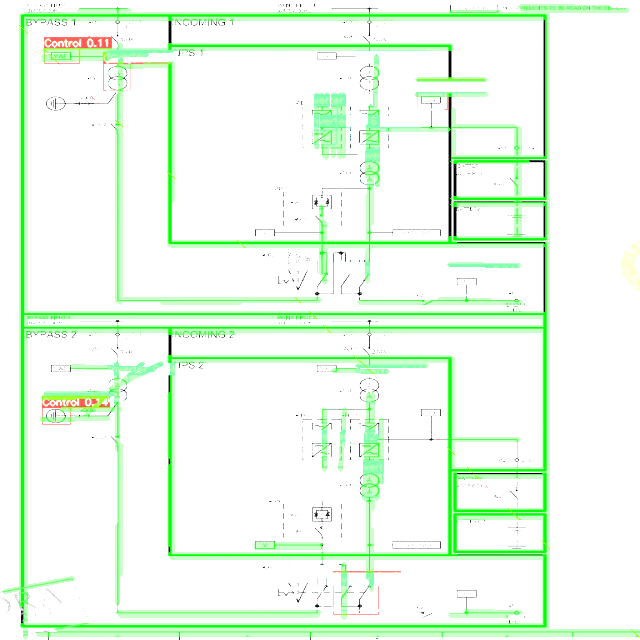

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for better edge smoothing
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(blurred)

    # Apply Contrast Stretching
    min_intensity = np.min(gray)
    max_intensity = np.max(gray)
    stretched = (gray - min_intensity) * (255.0 / (max_intensity - min_intensity))

    # Choose one of the enhanced images for further processing
    enhanced_image = stretched  # Change this line to use a different enhanced image


    # Apply morphological operations to enhance lines
    kernel = np.ones((2, 2), np.uint8)
    dilated = cv2.dilate(cl1, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(eroded, 50, 150)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, 1, np.pi/250, threshold=80, minLineLength=50, maxLineGap=5)

    # NEW: Enhance Line Segmentation
    if lines is not None:
        # Create a copy of the original image to draw lines
        line_image = np.copy(image)

        # Draw detected lines on the copied image
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 4)  # Increased thickness to 4

        # Calculate the start and end points of the line based on endpoints of detected lines
        all_x = lines[:, :, 0]
        all_y = lines[:, :, 1]
        min_x = np.min(all_x)
        max_x = np.max(all_x)
        min_y = np.min(all_y)
        max_y = np.max(all_y)
        lefty = int(min_y)
        righty = int(max_y)
        x = (min_x + max_x) // 4
        vx = 1  # Horizontal line
        vy = 0

        # Draw the line
        cv2.line(image, (image.shape[1]-1, righty), (0, lefty), (0, 0, 200), 1)

    # Apply weighted addition to overlay lines on the original image
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)

    # Save the result
    cv2.imwrite(output_path, result)

    # Display the result
    cv2_imshow(result)

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = 'output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)


In [ ]:
#OVERALL
import cv2
import numpy as np
import torch
from torchvision import transforms

# Define the preprocessing function
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny Edge Detector
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Draw detected lines on the original image
    line_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Return the preprocessed image
    return line_image

# Apply preprocessing to all images in the dataset
def apply_preprocessing_to_dataset(image_paths):
    preprocessed_images = []
    for image_path in image_paths:
        preprocessed_image = preprocess_image(image_path)
        preprocessed_images.append(preprocessed_image)
    return preprocessed_images

# Example usage for training, validation, and test sets
train_images = apply_preprocessing_to_dataset(train_image_paths)
valid_images = apply_preprocessing_to_dataset(valid_image_paths)
test_images = apply_preprocessing_to_dataset(test_image_paths)

# Convert preprocessed images to PyTorch tensors and create datasets
transform = transforms.ToTensor()
train_dataset = [(transform(img), label) for img, label in zip(train_images, train_labels)]
valid_dataset = [(transform(img), label) for img, label in zip(valid_images, valid_labels)]
test_dataset = [(transform(img), label) for img, label in zip(test_images, test_labels)]


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  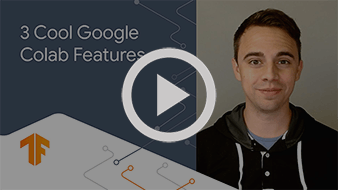
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

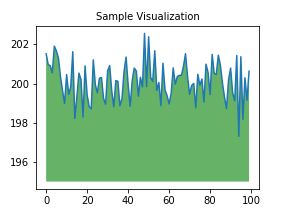

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


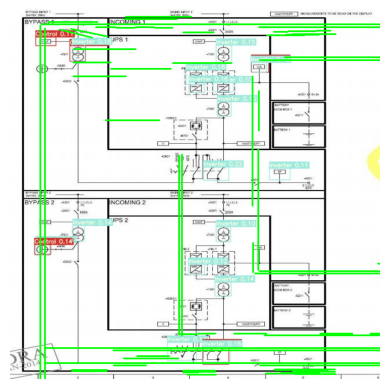

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to a higher resolution
    resized_image = cv2.resize(gray, (1600, 1200))

    # Apply adaptive median filtering
    median = cv2.medianBlur(resized_image, 5)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(median)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(cl1, 30, 100)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=30, minLineLength=50, maxLineGap=5)

    # Draw detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the result
    cv2.imwrite(output_path, image)

    # Display the result using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = '/mnt/data/output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)


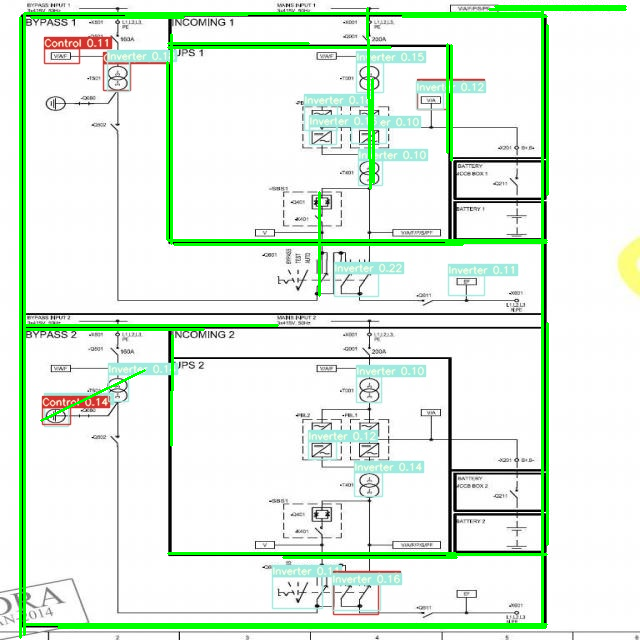

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive median filtering
    median = cv2.medianBlur(gray, 5)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(median)

    # Apply Canny edge detection
    edges = cv2.Canny(cl1, 50, 150)

    # Perform probabilistic Hough transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

    # Draw detected lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the result
    cv2.imwrite(output_path, image)

    # Display the result
    cv2_imshow(image)

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = 'output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)


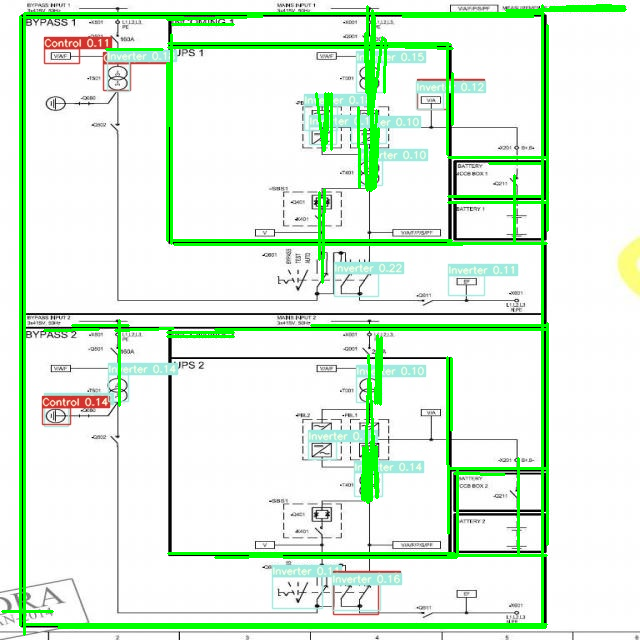

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive median filtering
    median = cv2.medianBlur(gray, 5)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(median)

    # Apply morphological operations
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(cl1, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(eroded, 50, 150)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)

    # Draw detected lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the result
    cv2.imwrite(output_path, image)

    # Display the result
    cv2_imshow(image)

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = 'output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)


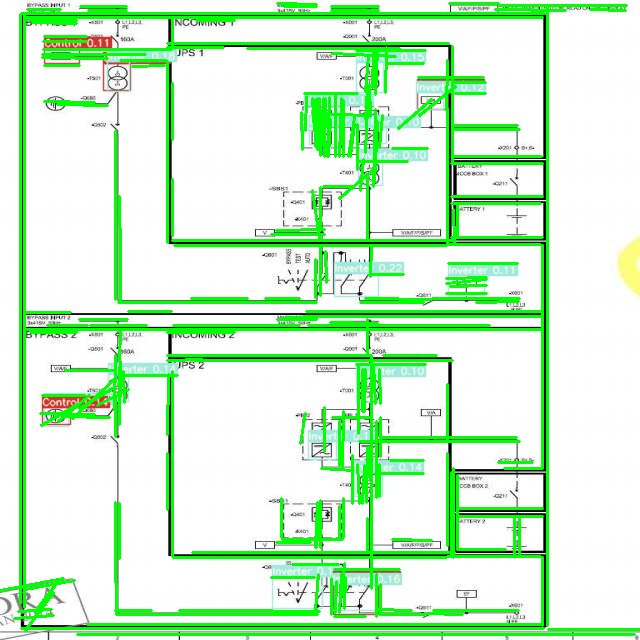

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def process_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for better edge smoothing
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(blurred)

    # Apply morphological operations
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(cl1, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(eroded, 50, 150)

    # Perform probabilistic Hough transform with adjusted parameters
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=5)

    # Draw detected lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Save the result
    cv2.imwrite(output_path, image)

    # Display the result
    cv2_imshow(image)

# Path to your image
image_path = '/content/c41_JPG.rf.b6e1d1e905422e039f751c612d30a8ec.jpg'

# Path to save the output image
output_path = 'output_image.jpg'

# Process the image and save the output
process_image(image_path, output_path)
